In [26]:
import networkit as nk
import jax
import jax.numpy as jnp
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

# User
import synthetic_benchmark as sn

In [45]:
key = jax.random.PRNGKey(13)
N = 3005
p = 0.6

W = jax.random.uniform(key, shape=(N, N))
W = jnp.tril(W, k=-1)
W = W + W.T
W = np.array(W)

In [46]:
G = nk.graph.Graph(n=N, weighted=True, edgesIndexed=True)
N, M = W.shape
for i in range(N):
    for j in range(M):
        G.addEdge(i, j, W[i, j])
        

4515101.672592878

In [49]:
nk.overview(G)

Network Properties:
nodes, edges			3005, 9030025
directed?			False
weighted?			True
isolated nodes			0
self-loops			3005
density				2.000000
min/max/avg degree		6009, 6009, 6009.000000
degree assortativity		nan
number of connected components	1
size of largest component	3005 (100.00 %)


In [50]:
apsp = nk.distance.APSP(G)

In [51]:
apsp.run()

In [52]:
D = apsp.getDistances(asarray=True)

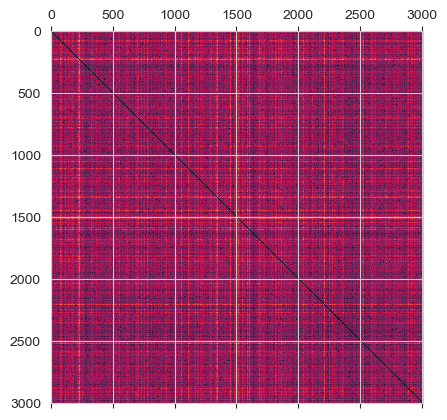

In [53]:
plt.matshow(D)